## Importing the Dataset:

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis (EDA)

In [3]:
df.shape

(614, 13)

total records rows 614 and columns 13

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

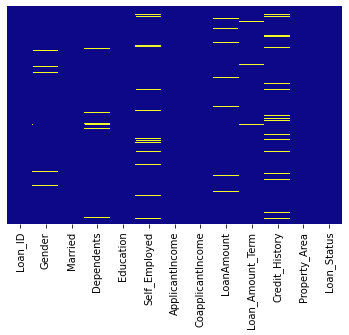

In [6]:
# checking the null value
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="plasma")

In [7]:
# fill the null values:

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [8]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [9]:
#Checking the null value again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

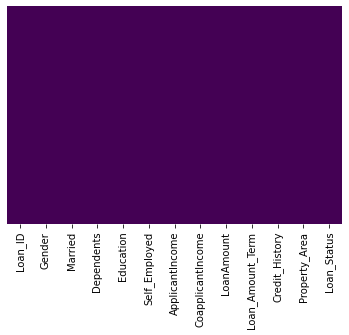

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [11]:
# Unique Data:

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [12]:
# Checking descriptive data description for continous data column.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## Observation of the columns:

In [13]:
# Checking data in Gender.
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [14]:
# Checking data in Married column
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [15]:
# Checking data in Dependent column
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
# Checking values in LoanAmount          
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [17]:
# Checking in Self employed column
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
# Checking number in Credit_History.
df['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [19]:
# Checking value counts in Loan_Amount_Term
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
# Checking values in LoanAmount          
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64

## Analysis by Visualizataion :

#### (i) Univeriate Analysis

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

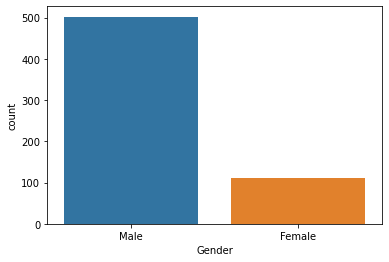

In [21]:
# ploting count plot for target variable.
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df)

Male      502
Female    112
Name: Gender, dtype: int64

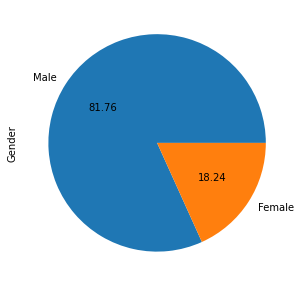

In [22]:
x = df['Gender'].value_counts([0])
x.plot(kind = 'pie', figsize = (5,5), fontsize=10, autopct = '%.2f')
df['Gender'].value_counts()


Yes    401
No     213
Name: Married, dtype: int64

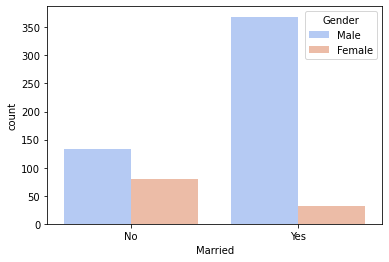

In [23]:
sns.countplot(df['Married'], palette='coolwarm', hue='Gender', data=df)
df['Married'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

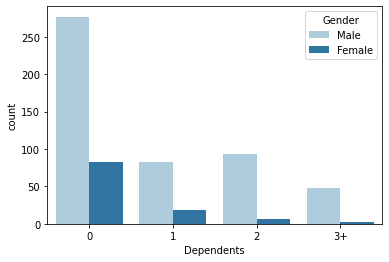

In [24]:
sns.countplot(df['Dependents'],palette='Paired',hue='Gender',data=df)
df['Dependents'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

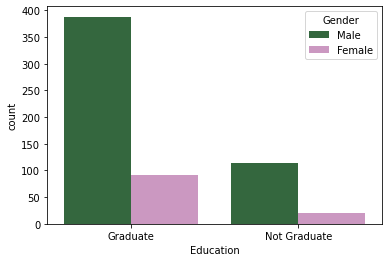

In [25]:
sns.countplot(df['Education'],palette='cubehelix',hue='Gender',data=df)
df['Education'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

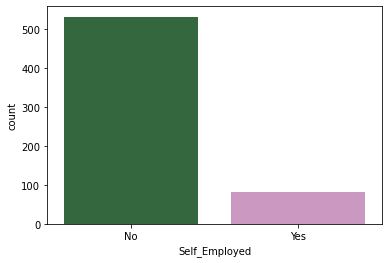

In [26]:
sns.countplot(df['Self_Employed'],palette='cubehelix')
df['Self_Employed'].value_counts()

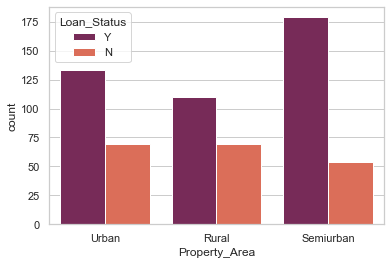

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette="rocket")

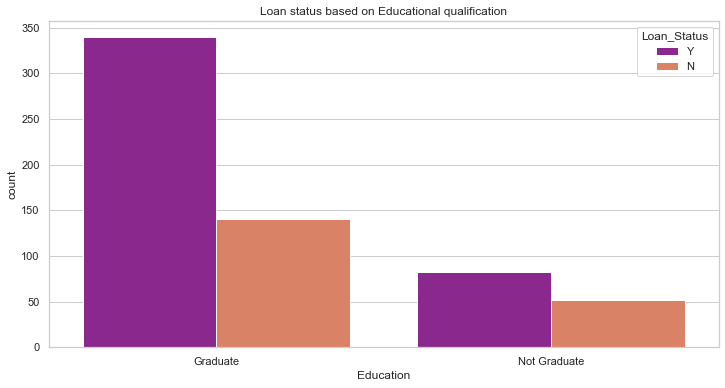

In [28]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Education", hue="Loan_Status", data=df, palette="plasma").set(title='Loan status based on Educational qualification')


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


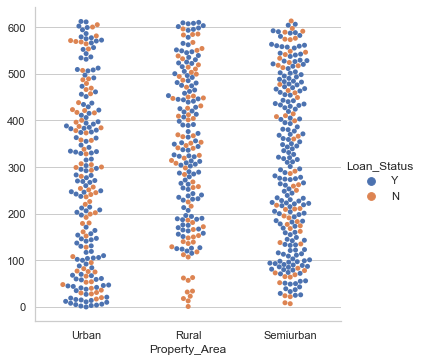

In [29]:
sns.catplot(x='Property_Area', y= df.index,data=df, hue='Loan_Status',kind='swarm')
print(df['Property_Area'].value_counts())

#### (ii) Bivariate Analysis

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>

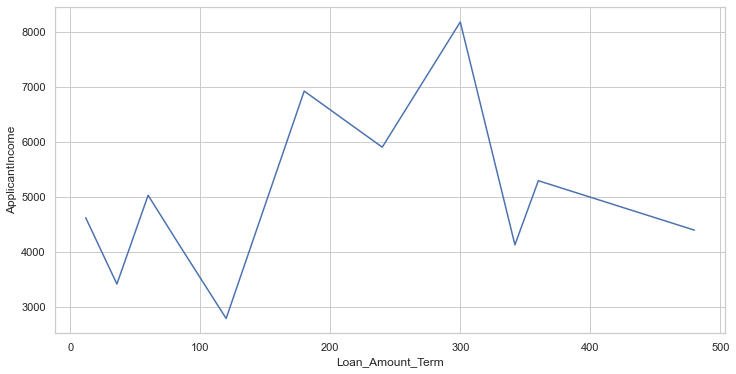

In [30]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Loan_Amount_Term", y="ApplicantIncome", ci=None)

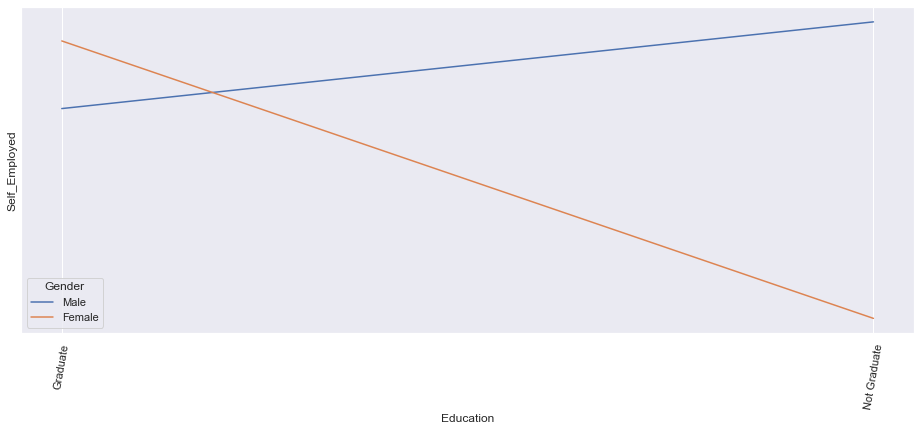

In [31]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, y="Self_Employed", x="Education", hue="Gender", ci=None)
plt.xticks(rotation=80)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

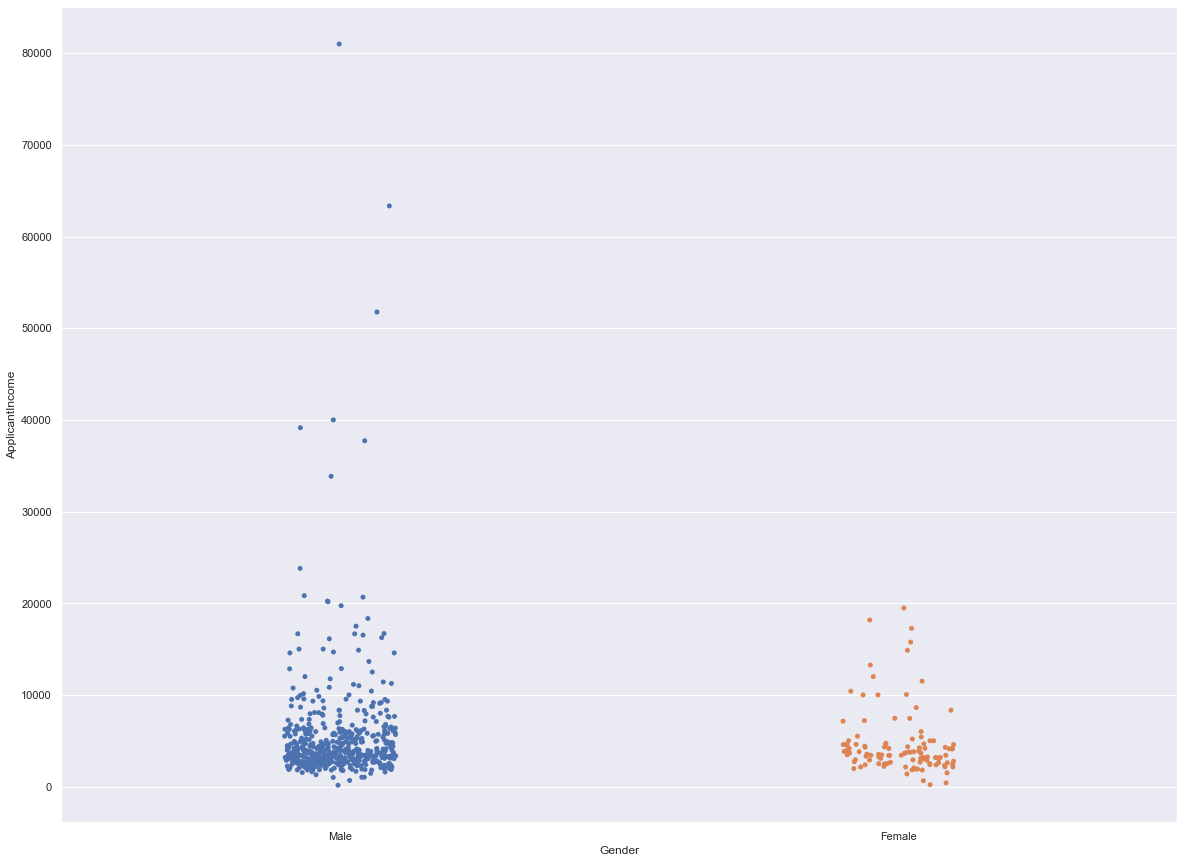

In [32]:
plt.figure(figsize=(20,15))
sns.stripplot(x='Gender', y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='Property_Area'>

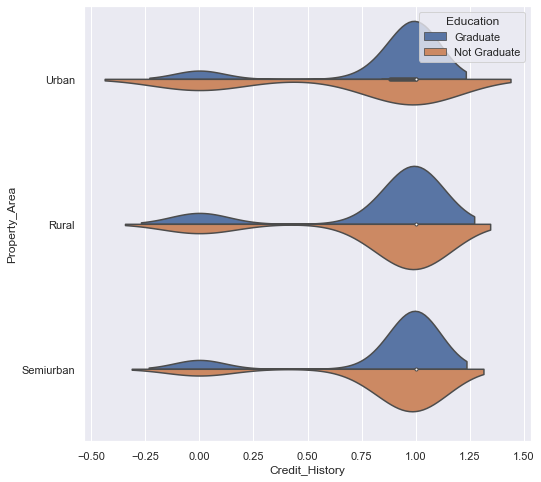

In [33]:
fig=plt.subplots(figsize=(8,8))
sns.violinplot(x='Credit_History', y='Property_Area', hue='Education', split=True, data=df)

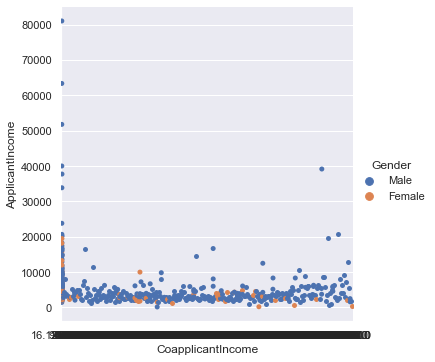

In [34]:
sns.catplot(x= 'CoapplicantIncome', y= 'ApplicantIncome',hue='Gender', data=df)

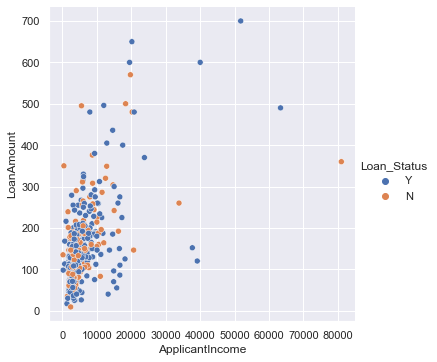

In [35]:
sns.relplot(x='ApplicantIncome', y='LoanAmount',data=df,hue='Loan_Status')

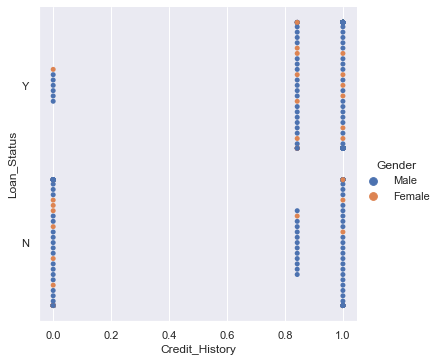

In [36]:
sns.catplot(x='Credit_History',y= 'Loan_Status',hue='Gender',data=df, kind='swarm')

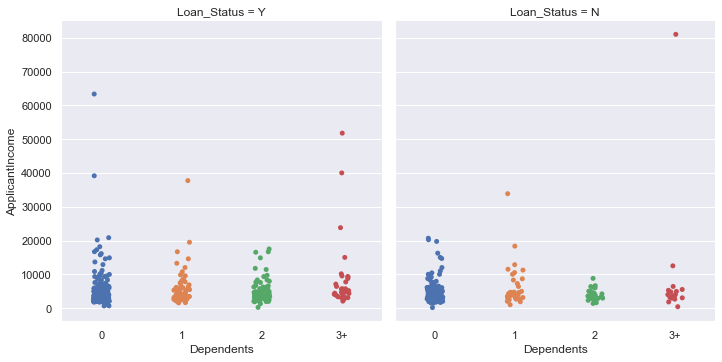

In [37]:
sns.catplot(x='Dependents',y='ApplicantIncome',data=df,col='Loan_Status')

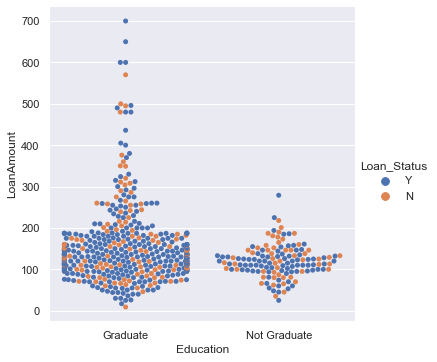

In [38]:
sns.catplot(x='Education',y='LoanAmount' ,data=df,kind='swarm',hue='Loan_Status')

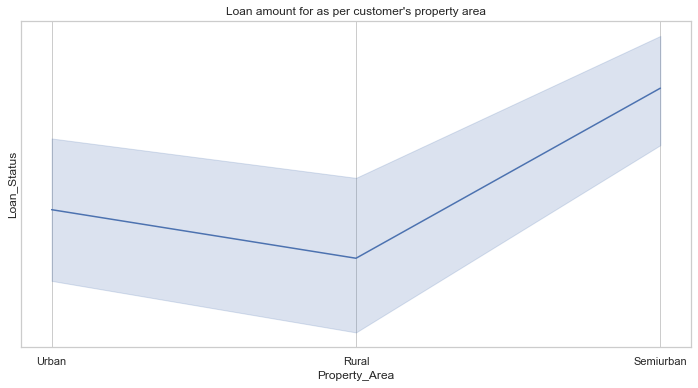

In [39]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="Property_Area", y="Loan_Status", data=df).set(title= "Loan amount for as per customer's property area")
plt.show()

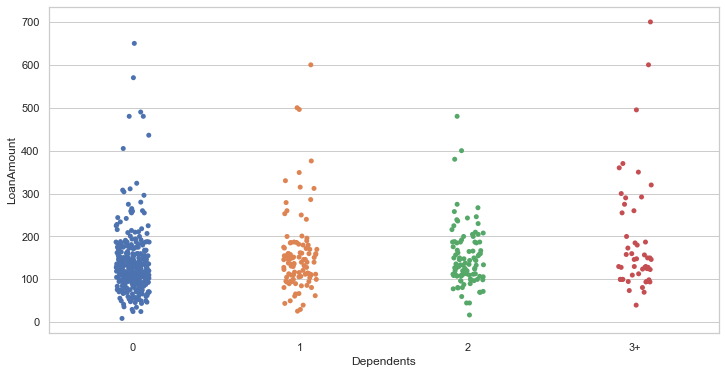

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.stripplot(x="Dependents", y="LoanAmount", data=df)
plt.show()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

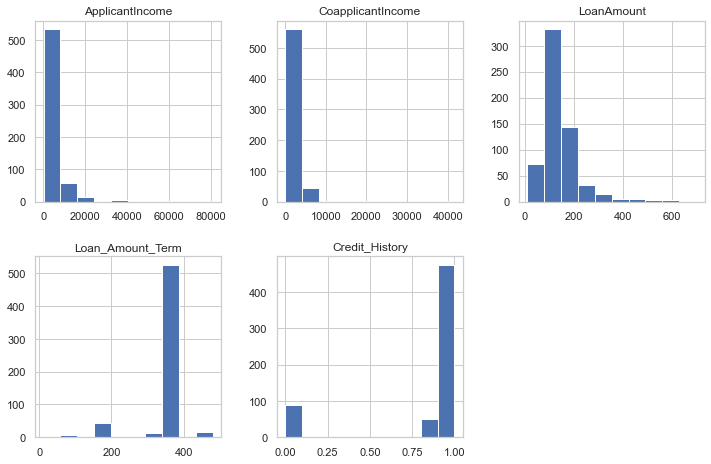

In [41]:
#histogram
df.hist(figsize=(12,12), layout=(3,3),sharex=False)

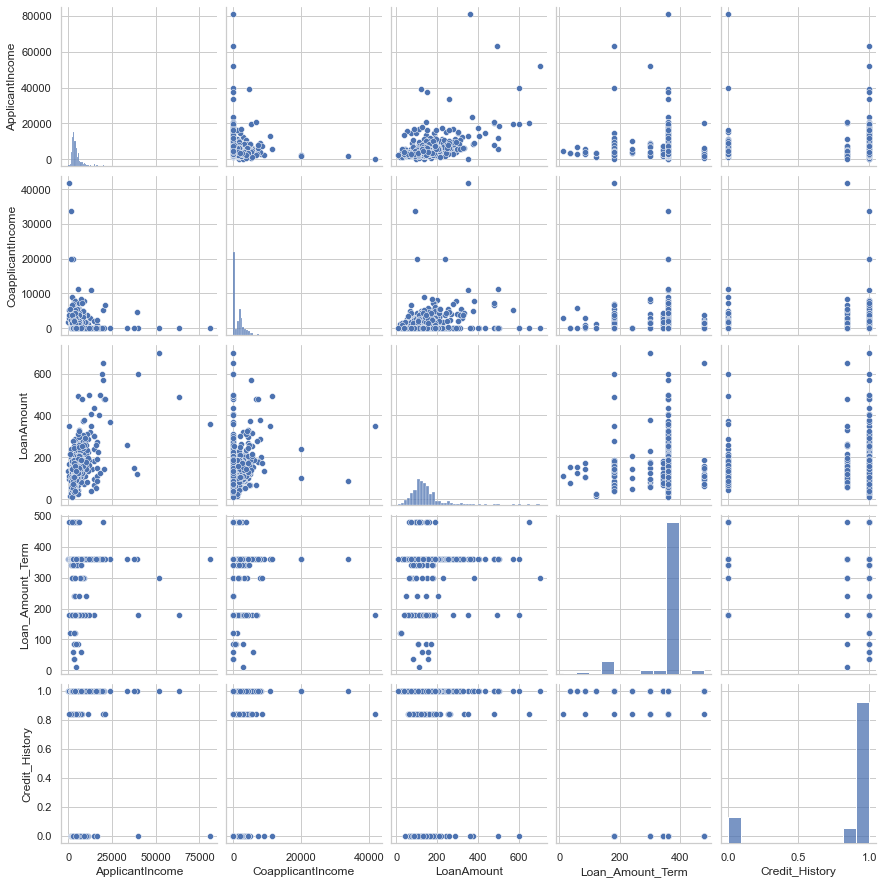

In [42]:
sns.pairplot(df)

#### (iii) multivariate analysis

In [43]:
# In order to perform multivariate analysis we have to convert our catagorical columns into integer data.
cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

In [44]:
# Before that we need to convert our catagorical data into numaric.
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
df[cols] = df[cols].apply(l_encoder.fit_transform)

In [45]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [46]:
# we can drop this Loan ID as this is not giving any information.
df.drop(['Loan_ID'],axis=1,inplace=True)

## correlation:

<AxesSubplot:>

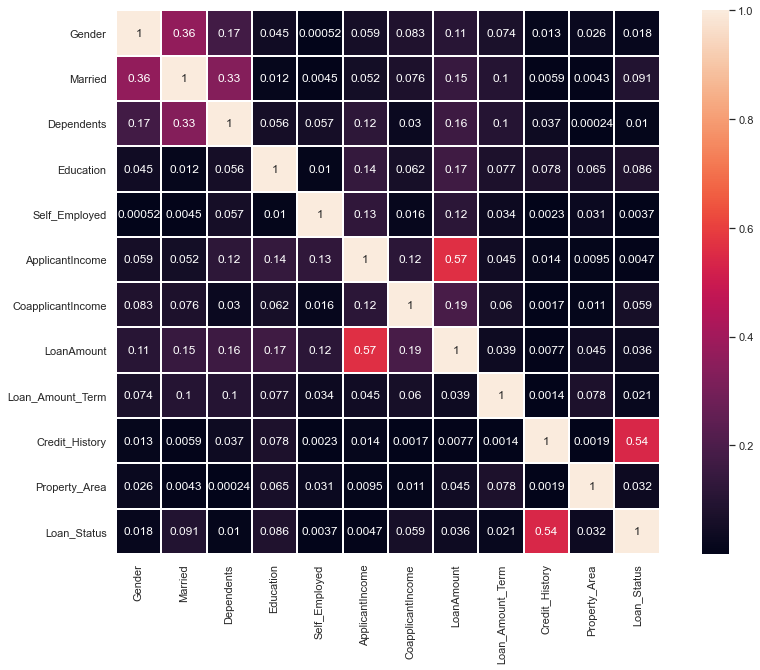

In [47]:
# Let's check correlationship between target variable and features variable.
data_corr = df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(data=data_corr,linewidths=1,annot=True, square=True,)

<AxesSubplot:title={'center':'Correlation with Loan_Status'}>

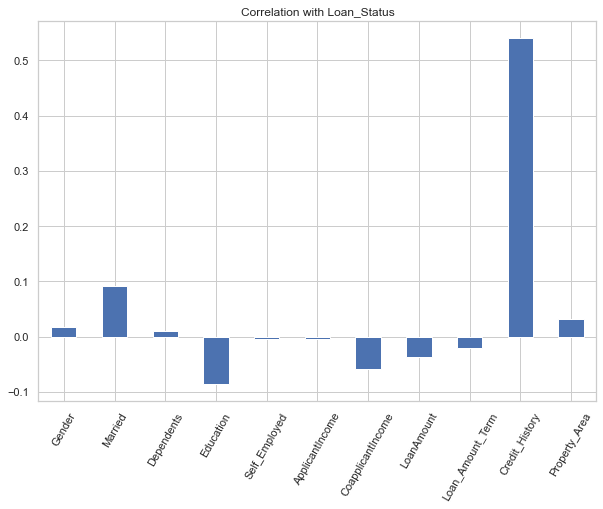

In [48]:
# let's calculate the featues Correlation values with our target variable.
df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status).plot(kind = 'bar', grid = True, figsize=(10,7),rot = 60,title = 'Correlation with Loan_Status')

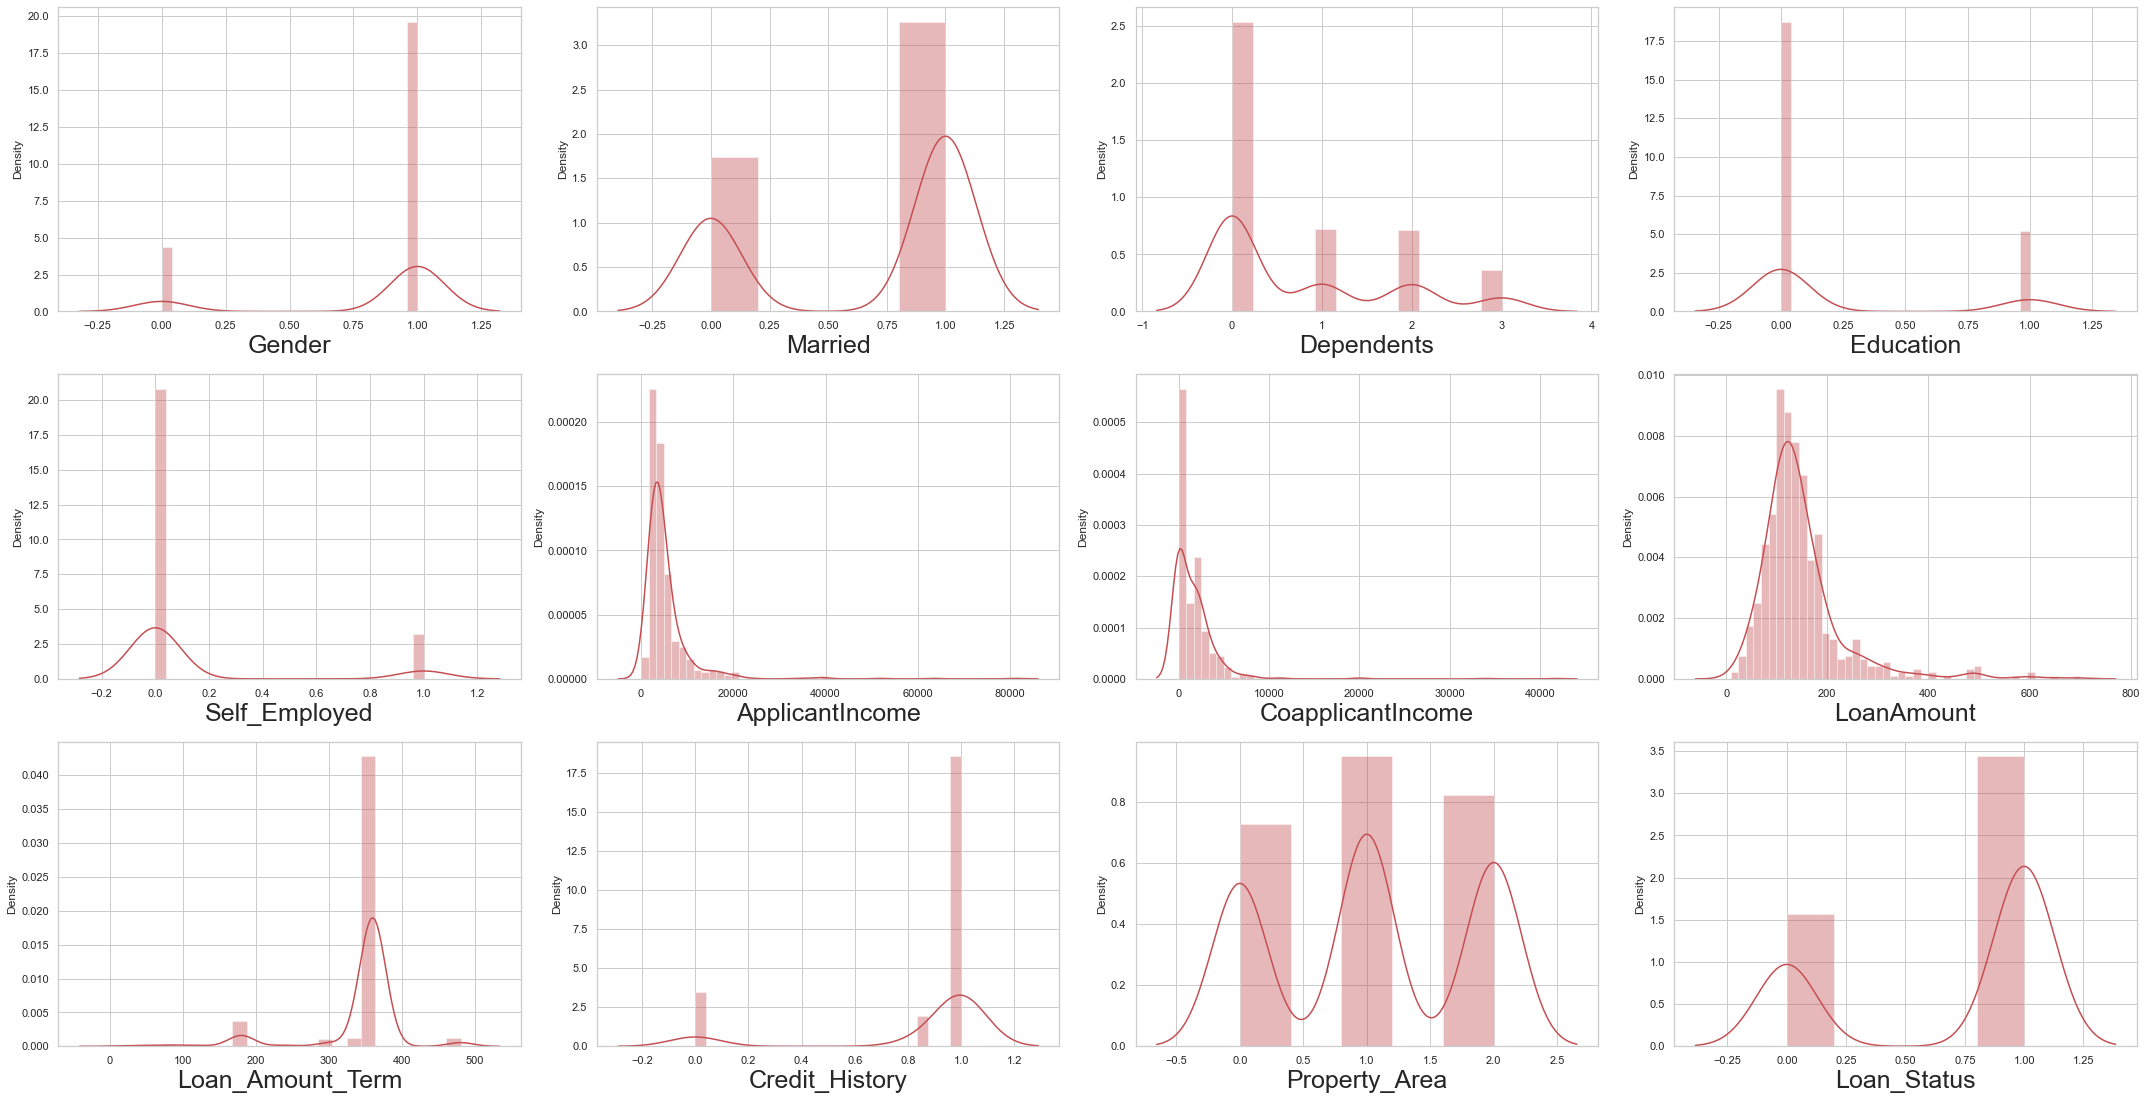

In [49]:
# Let's check data destribution first.
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

In [50]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

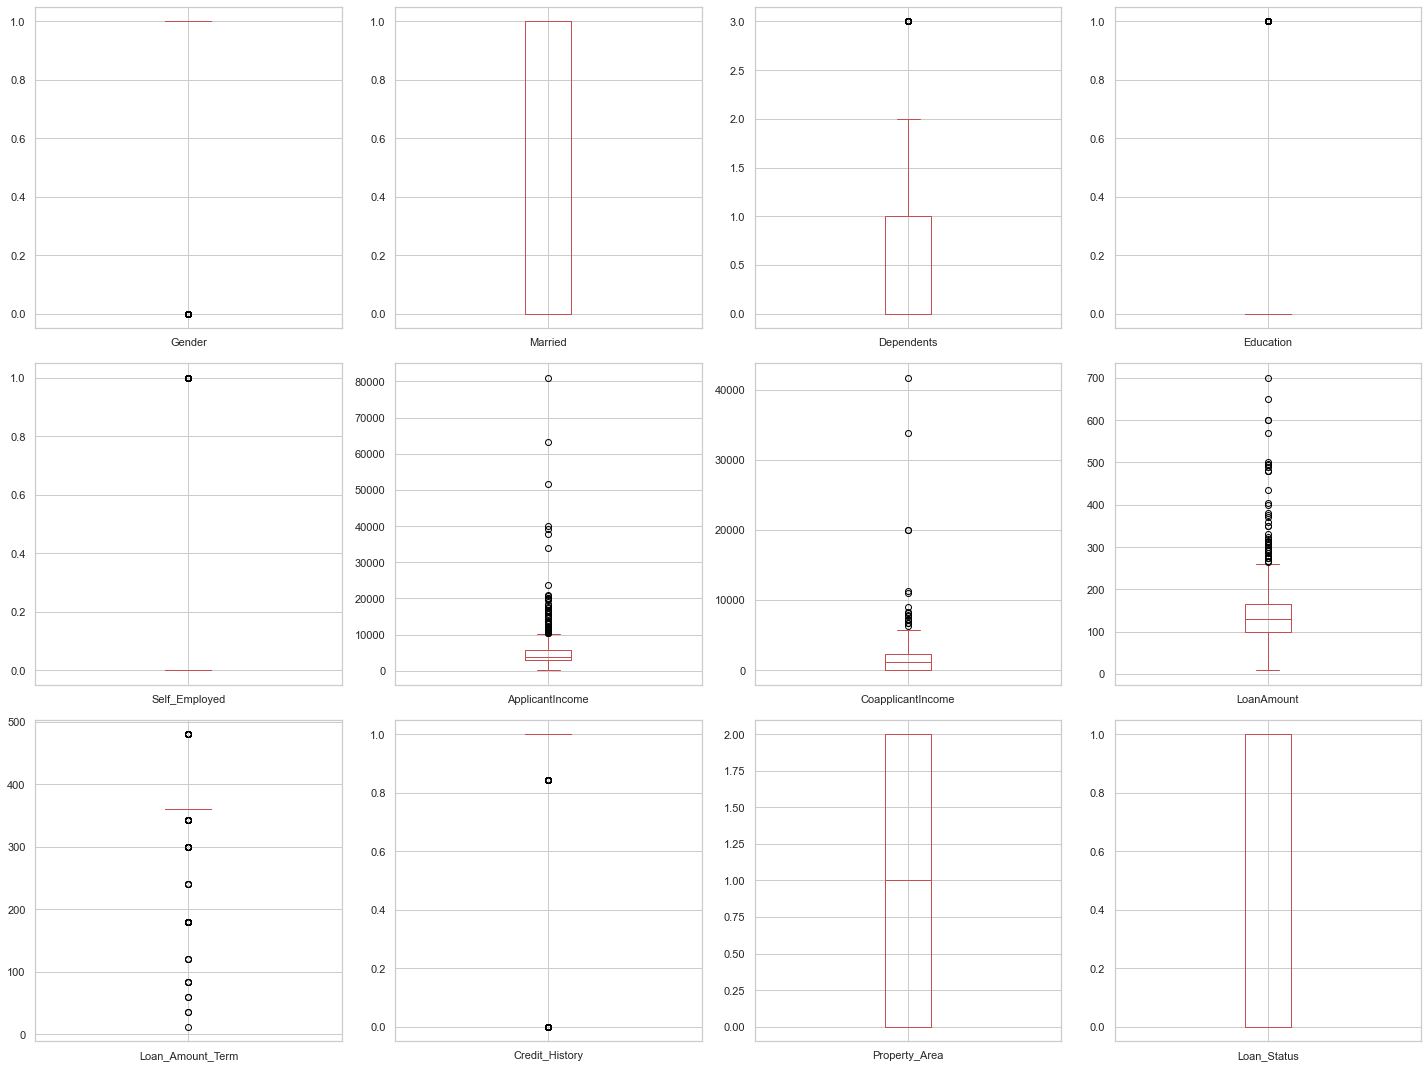

In [51]:
# Before removing skewness lets check with Outliers.
plt.figure(figsize=(20,15), facecolor='white')
count = 1
for column in df:
    if count<=12:
        ax = plt.subplot(3,4,count)
        df[column].plot(kind = 'box',color ='r')
    count +=1
plt.tight_layout()

In [52]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]))
filter_entry = (z<3).all(axis = 1)
data = df[filter_entry]

In [54]:
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [55]:
print(data.shape,df.shape)

(577, 12) (614, 12)


In [56]:
data_loss = ((614 - 577)/614)*100
data_loss

6.026058631921824

In [57]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.sqrt(data['CoapplicantIncome'])
data['LoanAmount'] = np.sqrt(data['LoanAmount'])
data['Loan_Amount_Term'] = np.power(data['Loan_Amount_Term'],3)

In [58]:
data.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term     0.745169
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [59]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,12.100089,46656000.0,1.0,2,1
1,1,1,1,0,0,8.430109,38.832976,11.313708,46656000.0,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,8.124038,46656000.0,1.0,2,1
3,1,1,0,1,0,7.856707,48.559242,10.954451,46656000.0,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,11.874342,46656000.0,1.0,2,1
5,1,1,2,0,1,8.597297,64.776539,16.340135,46656000.0,1.0,2,1
6,1,1,0,1,0,7.754910,38.935845,9.746794,46656000.0,1.0,2,1
7,1,1,3,0,0,8.018296,50.039984,12.569805,46656000.0,0.0,1,0
8,1,1,2,0,0,8.295549,39.064050,12.961481,46656000.0,1.0,2,1
10,1,1,2,0,0,8.070906,26.457513,8.366600,46656000.0,1.0,2,1


## Splitting dataset:

In [60]:
x = data.drop(columns = ["Loan_Status"], axis=1)
y = data["Loan_Status"]

## StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.47713685, -1.36251079, -0.72331271, ...,  0.14172398,
         0.45646138,  1.22747207],
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.14172398,
         0.45646138, -1.30652215],
       [ 0.47713685,  0.73393914, -0.72331271, ...,  0.14172398,
         0.45646138,  1.22747207],
       ...,
       [ 0.47713685,  0.73393914,  0.2823534 , ...,  0.14172398,
         0.45646138,  1.22747207],
       [ 0.47713685,  0.73393914,  1.28801951, ...,  0.14172398,
         0.45646138,  1.22747207],
       [-2.09583477, -1.36251079, -0.72331271, ...,  0.14172398,
        -2.37248823, -0.03952504]])

## VIF

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.220028,Gender
1,1.388005,Married
2,1.172707,Dependents
3,1.069762,Education
4,1.051257,Self_Employed
5,1.766093,ApplicantIncome
6,1.583753,CoapplicantIncome
7,1.633468,LoanAmount
8,1.052477,Loan_Amount_Term
9,1.009505,Credit_History


In [63]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

## Train and Test data:

In [64]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

## Finding best model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7866108786610879
[[100  23]
 [ 28  88]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       123
           1       0.79      0.76      0.78       116

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



## RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8158995815899581
[[96 27]
 [17 99]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       123
           1       0.79      0.85      0.82       116

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



## ExtraTreesClassifier

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

extra_reg = ExtraTreesClassifier()
extra_reg.fit(x_train,y_train)

y_pred = extra_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7949790794979079
[[95 28]
 [21 95]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       123
           1       0.77      0.82      0.79       116

    accuracy                           0.79       239
   macro avg       0.80      0.80      0.79       239
weighted avg       0.80      0.79      0.79       239



## KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7447698744769874
[[92 31]
 [30 86]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       123
           1       0.74      0.74      0.74       116

    accuracy                           0.74       239
   macro avg       0.74      0.74      0.74       239
weighted avg       0.74      0.74      0.74       239



## Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: 0.7088305847076461
Cross Validation score of RandomForestRegressor model is: 0.7972563718140929
Cross Validation score of ExtraTreesRegressor model is: 0.7764167916041979
Cross Validation score of KNeighborsRegressor model is: 0.6481859070464766


## ROC & AOC

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [72]:
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rf.predict(x_test)))
print('ROC_AUC_SCORE_EXTRA_TREE :',roc_auc_score(y_test,extra_reg.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,k_neigh.predict(x_test)))

ROC_AUC_SCORE_DECISION_TREE : 0.7858144098682366
ROC_AUC_SCORE_RANDOM_FOREST : 0.8169680403700589
ROC_AUC_SCORE_EXTRA_TREE : 0.7956616204093075
ROC_AUC_SCORE_KNN : 0.7446733950098122


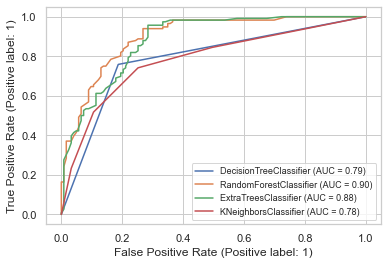

In [73]:
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(extra_reg, x_test, y_test, ax=disp.ax_)
plot_roc_curve(k_neigh, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':9},loc='lower right')
plt.show()

## Hyper Parameter Tuning

In [74]:
parameters = {"loss":["auto", "binary_crossentropy","categorical_crossentropy"],
              "max_iter":[20, 40, 60, 80, 100],
              "random_state":[30, 60, 90, 120, 150, 180, 200],
              "max_leaf_nodes":[1, 2, 3, 4, 5],
              "verbose":[0, 1, 2],
              "learning_rate":[0.1, 0.2, 0.3, 0.4, 0.5]      
            }

In [75]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Rebuild model:

In [76]:
param = {
    'bootstrap':[True],
    'n_estimators':(100,200,300),
    'n_jobs':[-1],
}

In [77]:
grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=param,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'n_estimators': (100, 200, 300),
                         'n_jobs': [-1]})

In [78]:
grid.best_params_

{'bootstrap': True, 'n_estimators': 300, 'n_jobs': -1}

In [79]:
rf_tuned=RandomForestClassifier(n_estimators=200,max_depth=2,n_jobs=-1)
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, n_jobs=-1)

In [80]:
y_pred_rf = rf_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rf_tuned.score(x_train,y_train))
print('TESTING SCORE : ', rf_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred_rf))

TRAINING SCORE :  0.7899461400359067
TESTING SCORE :  0.7782426778242678
ACCURACY : 0.7447698744769874
*****************************
              precision    recall  f1-score   support

           0       0.95      0.60      0.74       123
           1       0.70      0.97      0.81       116

    accuracy                           0.78       239
   macro avg       0.82      0.78      0.77       239
weighted avg       0.83      0.78      0.77       239



## Save the model:

In [81]:
import joblib
joblib.dump(rf,"Loan_Status.pkl")

['Loan_Status.pkl']

In [82]:
model = joblib.load("Loan_Status.pkl")

In [83]:
prediction = model.predict(x_test)

In [84]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,1
1,0
2,0
3,1
4,1
...,...
234,0
235,0
236,1
237,1
